In [1]:
!ls

sample_data


In [2]:
!pip install --upgrade https://github.com/fastai/fastai/archive/master.zip

     / 115.1MB 98.1MB/s
    100% |████████████████████████████████| 1.5MB 13.0MB/s 
    100% |████████████████████████████████| 112kB 25.5MB/s 
    100% |████████████████████████████████| 184kB 25.6MB/s 
    100% |████████████████████████████████| 3.6MB 7.8MB/s 
    100% |████████████████████████████████| 496.4MB 37kB/s 
    100% |████████████████████████████████| 51kB 16.4MB/s 
    100% |████████████████████████████████| 61kB 23.6MB/s 
    100% |████████████████████████████████| 2.2MB 896kB/s 
    100% |████████████████████████████████| 11.6MB 3.0MB/s 
    100% |████████████████████████████████| 92kB 24.1MB/s 
    100% |████████████████████████████████| 112kB 29.0MB/s 
    100% |████████████████████████████████| 901kB 2.7MB/s 
    100% |████████████████████████████████| 71kB 24.1MB/s 
    100% |████████████████████████████████| 4.4MB 3.5MB/s 
    100% |████████████████████████████████| 15.8MB 2.3MB/s 
    100% |████████████████████████████████| 1.5MB 5.2MB/s 
    100% |███████████████

In [0]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

## Style transfer

In [0]:
from fastai.conv_learner import *
from pathlib import Path
from scipy import ndimage
# torch.cuda.set_device(3)

torch.backends.cudnn.benchmark=True

In [0]:
PATH = Path('data/imagenet')
PATH_TRN = PATH/'train'
os.makedirs(PATH, exist_ok=True)

In [104]:
!curl --header "Host: files.fast.ai" --header "User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/62.0.3202.62 Safari/537.36" --header "Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8" --header "Accept-Language: zh,zh-CN;q=0.9,zh-TW;q=0.8,en-US;q=0.7,en;q=0.6" --header "Cookie: _ga=GA1.2.641893244.1519873283; _gid=GA1.2.1704745014.1534313997" --header "Connection: keep-alive" "http://files.fast.ai/data/imagenet-sample-train.tar.gz" -o "imagenet-sample-train.tar.gz" -L
!tar xf imagenet-sample-train.tar.gz -C {PATH}

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2129M  100 2129M    0     0  35.4M      0  0:01:00  0:01:00 --:--:-- 35.5M


In [0]:
!cp {PATH_TRN}/'n01558993'/'n01558993_9684.JPEG' {PATH}/bird.jpg

In [6]:
!curl --header "Host: b-ssl.duitang.com" --header "User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/62.0.3202.62 Safari/537.36" --header "Accept-Language: zh,zh-CN;q=0.9,zh-TW;q=0.8,en-US;q=0.7,en;q=0.6" --header "Cookie: Hm_lvt_d8276dcc8bdfef6bb9d5bc9e3bcfcaf4=1536221665; Hm_lpvt_d8276dcc8bdfef6bb9d5bc9e3bcfcaf4=1536221665; sessionid=a9a0dfe1-195d-42aa-b44f-3a2bdccf9e52" --header "Connection: keep-alive" "https://b-ssl.duitang.com/uploads/blog/201512/23/20151223160126_aNWYy.jpeg" -o "20151223160126_aNWYy.jpeg" -L
!curl --header "Host: image.baidu.com" --header "User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/62.0.3202.62 Safari/537.36" --header "Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8" --header "Accept-Language: zh,zh-CN;q=0.9,zh-TW;q=0.8,en-US;q=0.7,en;q=0.6" --header "Cookie: BDIMGISLOGIN=0; winWH=%5E6_1366x613; BDqhfp=%25C4%25F1%25CD%25BC%25BF%25E2%2520%25B8%25DF%25C7%25E5%26%26NaN-1undefined%26%261531%26%263; BDUSS=1pNXdhdHF3aHRodi02bXlYY2FNUzMwUUx4ekVFRXhvTmtISnFGVFBtVjIxNmhhQVFBQUFBJCQAAAAAAAAAAAEAAAAPD9ADbmlrc2h1YW5nAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHZKgVp2SoFaeE; BAIDUID=60C68670E0085F016EB2E682F39E8068:FG=1; PSTM=1534229109; BIDUPSID=F265B0867211A82363D3F547FA7F51DA; pgv_pvi=2541713408; BDRCVFR[S4-dAuiWMmn]=I67x6TjHwwYf0; cflag=15%3A3; BDRCVFR[feWj1Vr5u3D]=I67x6TjHwwYf0; BDRCVFR[dG2JNJb_ajR]=mk3SLVN4HKm; pgv_si=s5989601280; PSINO=7; H_PS_PSSID=1444_21113_26350_22158; BDORZ=B490B5EBF6F3CD402E515D22BCDA1598; userFrom=ala; PMS_JT=%28%7B%22s%22%3A1536222224620%2C%22r%22%3A%22https%3A//image.baidu.com/search/index%3Ftn%3Dbaiduimage%26ct%3D201326592%26lm%3D-1%26cl%3D2%26ie%3Dgb18030%26word%3D%25C4%25F1%25CD%25BC%25BF%25E2%2520%25B8%25DF%25C7%25E5%26fr%3Dala%26ala%3D1%26alatpl%3Dadress%26pos%3D0%26hs%3D2%26xthttps%3D111111%22%7D%29" --header "Connection: keep-alive" "https://image.baidu.com/search/down?tn=download&ipn=dwnl&word=download&ie=utf8&fr=result&url=http%3A%2F%2Fpic.baike.soso.com%2Fp%2F20140429%2F20140429103539-866427364.jpg&thumburl=https%3A%2F%2Fss2.bdstatic.com%2F70cFvnSh_Q1YnxGkpoWK1HF6hhy%2Fit%2Fu%3D4041106099%2C2627960423%26fm%3D26%26gp%3D0.jpg" -o "59579785404ccd3f11f08c6a50986ebc.jpg" -L
!wget --header="Host: timgsa.baidu.com" --header="User-Agent: Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/68.0.3440.106 Safari/537.36" --header="Accept-Language: zh,zh-CN;q=0.9,zh-TW;q=0.8,en-US;q=0.7,en;q=0.6" --header="Cookie: PSTM=1500089363; BIDUPSID=8F4B0C3312C57B1549EB76DFCC821677; MCITY=-%3A; BDUSS=C0zUTFUS3JCSy10SXBudn5NYU5rTGlCSTIxb0dsVXNnZ1ZvN3FBM0NramEtcnhhQVFBQUFBJCQAAAAAAAAAAAEAAAAPD9ADbmlrc2h1YW5nAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAANptlVrabZVac; BAIDUID=75FF6C995F069C85588B4370446E75EB:FG=1; BDORZ=FFFB88E999055A3F8A630C64834BD6D0; BDRCVFR[wjT78r1YDGs]=IdAnGome-nsnWnYPi4WUvY; PSINO=2; BDRCVFR[cfqDsv-xoJY]=IdAnGome-nsnWnYPi4WUvY; BDRCVFR[RAXL8WkCOm_]=aeXf-1x8UdYcs; H_PS_PSSID=1427_21086; userFrom=ala" --header="Connection: keep-alive" "https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1537200533091&di=9562e2e2b8a5514629167e554d48933b&imgtype=0&src=http%3A%2F%2Fimg011.hc360.cn%2Fy3%2FM05%2FBB%2F79%2FwKhQh1XGpCeEOmRTAAAAAET1954383.jpg" -O "timg.jpg" -c
!cp 20151223160126_aNWYy.jpeg {PATH}/style.jpg
!cp 59579785404ccd3f11f08c6a50986ebc.jpg {PATH}/bird.jpg
!cp timg.jpg {PATH}/timg.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  262k  100  262k    0     0  11665      0  0:00:23  0:00:23 --:--:-- 24134
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   99k    0   99k    0     0  17045      0 --:--:--  0:00:06 --:--:-- 23795

Redirecting output to ‘wget-log’.


In [209]:
!curl --header "Host: image.baidu.com" --header "User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/62.0.3202.62 Safari/537.36" --header "Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8" --header "Accept-Language: zh,zh-CN;q=0.9,zh-TW;q=0.8,en-US;q=0.7,en;q=0.6" --header "Cookie: BDqhfp=%25E8%25F3%25B8%25DF%26%26NaN-1undefined%26%266671%26%2611; winWH=%5E6_1366x662; BDIMGISLOGIN=0; BDUSS=1pNXdhdHF3aHRodi02bXlYY2FNUzMwUUx4ekVFRXhvTmtISnFGVFBtVjIxNmhhQVFBQUFBJCQAAAAAAAAAAAEAAAAPD9ADbmlrc2h1YW5nAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHZKgVp2SoFaeE; BAIDUID=60C68670E0085F016EB2E682F39E8068:FG=1; PSTM=1534229109; BIDUPSID=F265B0867211A82363D3F547FA7F51DA; indexPageSugList=%5B%22%E6%A2%B5%E9%AB%98%20%E6%98%9F%E7%A9%BA%20%E8%B6%85%E6%B8%85%22%5D; cleanHistoryStatus=0; ZD_ENTRY=empty; BDRCVFR[-pGxjrCMryR]=mk3SLVN4HKm; PSINO=7; H_PS_PSSID=1444_21113_26350_22158; BDORZ=B490B5EBF6F3CD402E515D22BCDA1598; BDRCVFR[dG2JNJb_ajR]=mk3SLVN4HKm; BDRCVFR[tox4WRQ4-Km]=mk3SLVN4HKm; userFrom=ala; PMS_JT=%28%7B%22s%22%3A1537342190734%2C%22r%22%3A%22https%3A//image.baidu.com/search/index%3Ftn%3Dbaiduimage%26ct%3D201326592%26lm%3D-1%26cl%3D2%26ie%3Dgb18030%26word%3D%25E8%25F3%25B8%25DF%26fr%3Dala%26ala%3D1%26alatpl%3Dadress%26pos%3D0%26hs%3D2%26xthttps%3D111111%22%7D%29" --header "Connection: keep-alive" "https://image.baidu.com/search/down?tn=download&ipn=dwnl&word=download&ie=utf8&fr=result&url=http%3A%2F%2Fhiphotos.baidu.com%2Frelucent%2Fpic%2Fitem%2Fcec32ef5d17ae356bd310986.jpg&thumburl=https%3A%2F%2Fss1.bdstatic.com%2F70cFuXSh_Q1YnxGkpoWK1HF6hhy%2Fit%2Fu%3D1894934184%2C2024958095%26fm%3D27%26gp%3D0.jpg" -o "CurlWget477" -L
!cp CurlWget477 {PATH}/starry_night.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  480k    0  480k    0     0  37851      0 --:--:--  0:00:13 --:--:-- 54939


In [0]:
m_vgg = to_gpu(vgg16(True)).eval()
set_trainable(m_vgg, False)

In [0]:
def open_image(fn):
    """ Opens an image using OpenCV given the file path.

    Arguments:
        fn: the file path of the image

    Returns:
        The image in RGB format as numpy array of floats normalized to range between 0.0 - 1.0
    """
    flags = cv2.IMREAD_UNCHANGED+cv2.IMREAD_ANYDEPTH+cv2.IMREAD_ANYCOLOR
    if not os.path.exists(fn) and not str(fn).startswith("http"):
        raise OSError('No such file or directory: {}'.format(fn))
    elif os.path.isdir(fn) and not str(fn).startswith("http"):
        raise OSError('Is a directory: {}'.format(fn))
#     elif isdicom(fn):
#         slice = pydicom.read_file(fn)
#         if slice.PhotometricInterpretation.startswith('MONOCHROME'):
#             # Make a fake RGB image
#             im = np.stack([slice.pixel_array]*3,-1)
#             return im / ((1 << slice.BitsStored)-1)
#         else:
#             # No support for RGB yet, as it involves various color spaces.
#             # It shouldn't be too difficult to add though, if needed.
#             raise OSError('Unsupported DICOM image with PhotometricInterpretation=={}'.format(slice.PhotometricInterpretation))
    else:
        #res = np.array(Image.open(fn), dtype=np.float32)/255
        #if len(res.shape)==2: res = np.repeat(res[...,None],3,2)
        #return res
        try:
            if str(fn).startswith("http"):
                req = urllib.urlopen(str(fn))
                image = np.asarray(bytearray(req.read()), dtype="uint8")
                im = cv2.imdecode(image, flags).astype(np.float32)/255
            else:
                im = cv2.imread(str(fn), flags).astype(np.float32)/255
            if im is None: raise OSError(f'File not recognized by opencv: {fn}')
            return cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
        except Exception as e:
            raise OSError('Error handling image at: {}'.format(fn)) from e

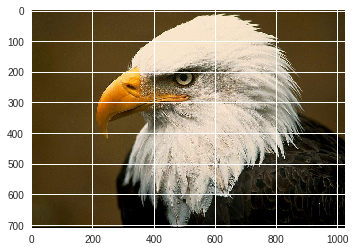

In [159]:
# img_fn = PATH_TRN/'n01558993'/'n01558993_9684.JPEG'
img_fn = f'{PATH}/bird.jpg'
img = open_image(img_fn)
plt.imshow(img)

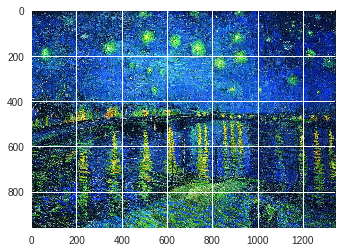

In [233]:
# img_fn = PATH/'starry_night.jpg'
img_fn = PATH/'timg.jpg'
style_img = open_image(img_fn)
plt.imshow(style_img)

In [234]:
img.shape, style_img.shape

((710, 1024, 3), (960, 1344, 3))

In [0]:
sz=img.shape[0]

In [168]:
trn_tfms,val_tfms = tfms_from_model(vgg16, sz)
img_tfm = val_tfms(img)
img_tfm.shape

(3, 710, 710)

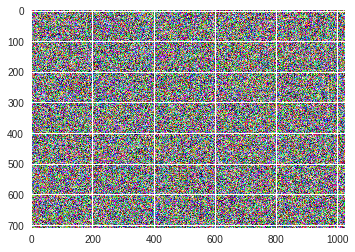

In [169]:
output_img = np.random.uniform(0, 1, size=img.shape).astype(np.float32)
plt.imshow(output_img);

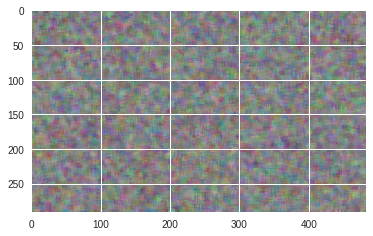

In [115]:
output_img  = scipy.ndimage.filters.median_filter(output_img , [8,8,1])
plt.imshow(output_img );

In [170]:
output_img.shape

(710, 1024, 3)

In [117]:
# val_tfms()
output_img = val_tfms(output_img)/2
output_img_v = V(output_img[None], requires_grad=True)
output_img_v.shape

torch.Size([1, 3, 291, 291])

In [0]:
m_vgg = nn.Sequential(*children(m_vgg)[:37])

In [119]:
targ_t = m_vgg(VV(img_tfm[None]))
targ_v = V(targ_t)
targ_t.shape

torch.Size([1, 512, 18, 18])

In [0]:
max_iter = 1000
show_iter = 100
optimizer = optim.LBFGS([output_img_v], lr=0.5)

In [0]:
def actn_loss(x): return F.mse_loss(m_vgg(x), targ_v)*1000

In [0]:
def step(loss_fn):
    global n_iter
    optimizer.zero_grad()
    loss = loss_fn(output_img_v)
    loss.backward()
    n_iter+=1
    if n_iter%show_iter==0: print(f'Iteration: n_iter, loss: {loss.data[0]}')
    return loss

In [123]:
n_iter=0
while n_iter <= max_iter: optimizer.step(partial(step,actn_loss))

Iteration: n_iter, loss: 0.8688574433326721
Iteration: n_iter, loss: 0.37883904576301575
Iteration: n_iter, loss: 0.24260026216506958
Iteration: n_iter, loss: 0.18412092328071594
Iteration: n_iter, loss: 0.14971521496772766
Iteration: n_iter, loss: 0.1298811435699463
Iteration: n_iter, loss: 0.11577091366052628
Iteration: n_iter, loss: 0.10592560470104218
Iteration: n_iter, loss: 0.09848631173372269
Iteration: n_iter, loss: 0.09222844988107681


In [124]:
x = val_tfms.denorm(np.rollaxis(to_np(output_img_v.data),1,4))[0]
x.shape

(291, 291, 3)

In [0]:
plt.figure(figsize=(7,7))
plt.imshow(x.clip(0, 1))
# plt.imshow(x)

## forward hook

In [0]:
m_vgg = to_gpu(vgg16(True)).eval()
set_trainable(m_vgg, False)

In [0]:
class SaveFeatures():
    features=None
    def __init__(self, m): self.hook = m.register_forward_hook(self.hook_fn)
    def hook_fn(self, module, input, output): self.features = output
    def close(self): self.hook.remove()

In [173]:
block_ends = [i-1 for i,o in enumerate(children(m_vgg))
              if isinstance(o,nn.MaxPool2d)]
block_ends

[5, 12, 22, 32, 42]

In [0]:
sf = SaveFeatures(children(m_vgg)[block_ends[3]])

In [0]:
def get_opt():
    output_img = np.random.uniform(0, 1, size=img.shape).astype(np.float32)
    output_img = scipy.ndimage.filters.median_filter(output_img, [8,8,1])
    output_img_v = V(val_tfms(output_img/2)[None], requires_grad=True)
    return output_img_v, optim.LBFGS([output_img_v])

In [0]:
output_img_v, optimizer = get_opt()

In [178]:
m_vgg(VV(img_tfm[None]))
targ_v = V(sf.features.clone())
targ_v.shape

torch.Size([1, 512, 88, 88])

In [0]:
def content_loss(x):
    m_vgg(x)
    out = V(sf.features)
    return F.mse_loss(out, targ_v)*1000

In [180]:
max_iter = 2000
n_iter=0
while n_iter <= max_iter: optimizer.step(partial(step,content_loss))

Iteration: n_iter, loss: 0.14002405107021332
Iteration: n_iter, loss: 0.05928822606801987
Iteration: n_iter, loss: 0.037577468901872635
Iteration: n_iter, loss: 0.027887802571058273
Iteration: n_iter, loss: 0.02253057062625885
Iteration: n_iter, loss: 0.01918598636984825
Iteration: n_iter, loss: 0.016832195222377777
Iteration: n_iter, loss: 0.015042142942547798
Iteration: n_iter, loss: 0.013666849583387375
Iteration: n_iter, loss: 0.01256621815264225


In [181]:
x = val_tfms.denorm(np.rollaxis(to_np(output_img_v.data),1,4))[0]
x.shape

(710, 710, 3)

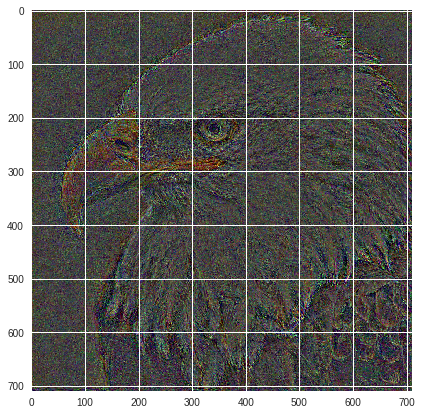

In [184]:
plt.figure(figsize=(7,7))
plt.imshow(x.clip(0, 1))
# plt.imshow(x)

In [0]:
sf.close()

## Style match

In [0]:
# style_fn = PATH/'style'/'starry_night.jpg'
# style_img = open_image(style_fn)
# style_img.shape, img.shape

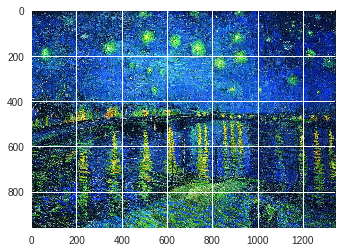

In [235]:
plt.imshow(style_img);

In [0]:
def scale_match(src, targ):
    h,w,_ = src.shape
    sh,sw,_ = targ.shape
    rat = max(h/sh,w/sw); rat
    res = cv2.resize(targ, (int(sw*rat), int(sh*rat)))
    return res[:h,:w]

In [0]:
style = scale_match(img, style_img)

((710, 1024, 3), (710, 1024, 3))

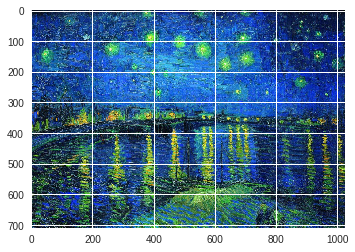

In [237]:
plt.imshow(style)
style.shape, img.shape

In [0]:
output_img_v, optimizer = get_opt()

In [0]:
sfs = [SaveFeatures(children(m_vgg)[idx]) for idx in block_ends]

In [260]:
m_vgg(VV(img_tfm[None]))
targ_vs = [V(o.features.clone()) for o in sfs]
[o.shape for o in targ_vs]

[torch.Size([1, 64, 710, 710]),
 torch.Size([1, 128, 355, 355]),
 torch.Size([1, 256, 177, 177]),
 torch.Size([1, 512, 88, 88]),
 torch.Size([1, 512, 44, 44])]

In [0]:
style_tfm = val_tfms(style_img)

In [259]:
m_vgg(VV(style_tfm[None]))
targ_styles = [V(o.features.clone()) for o in sfs]
[o.shape for o in targ_styles]

[torch.Size([1, 64, 710, 710]),
 torch.Size([1, 128, 355, 355]),
 torch.Size([1, 256, 177, 177]),
 torch.Size([1, 512, 88, 88]),
 torch.Size([1, 512, 44, 44])]

In [0]:
def gram(input):
        b,c,h,w = input.size()
        x = input.view(b*c, -1)
        return torch.mm(x, x.t())/input.numel()*1e6

def gram_mse_loss(input, target): return F.mse_loss(gram(input), gram(target))

In [0]:
def style_loss(x):
    m_vgg(output_img_v)
    outs = [V(o.features) for o in sfs]
    losses = [gram_mse_loss(o, s) for o,s in zip(outs, targ_styles)]
    return sum(losses)

In [245]:
n_iter=0
while n_iter <= max_iter: optimizer.step(partial(step,style_loss))

Iteration: n_iter, loss: 52.1091423034668
Iteration: n_iter, loss: 4.63181209564209
Iteration: n_iter, loss: 0.9747222661972046
Iteration: n_iter, loss: 0.4136861264705658
Iteration: n_iter, loss: 0.2491530179977417
Iteration: n_iter, loss: 0.1806013584136963
Iteration: n_iter, loss: 0.14466366171836853
Iteration: n_iter, loss: 0.12279225140810013
Iteration: n_iter, loss: 0.10791991651058197
Iteration: n_iter, loss: 0.09749597311019897


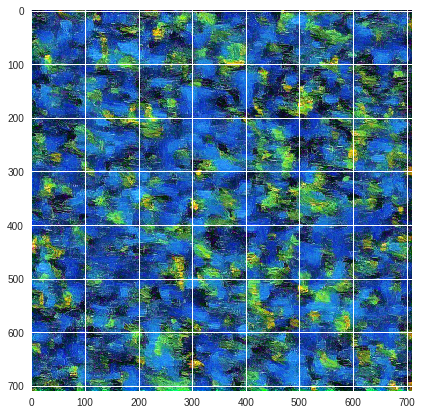

In [246]:
x = val_tfms.denorm(np.rollaxis(to_np(output_img_v.data),1,4))[0]
plt.figure(figsize=(7,7))
plt.imshow(x.clip(0, 1))

In [0]:
for sf in sfs: sf.close()

## Style transfer

In [0]:
output_img_v, optimizer = get_opt()

In [0]:
def comb_loss(x):
    m_vgg(output_img_v)
    outs = [V(o.features) for o in sfs]
    losses = [gram_mse_loss(o, s) for o,s in zip(outs, targ_styles)]
    cnt_loss   = F.mse_loss(outs[3], targ_vs[3])*1e+6
    style_loss = sum(losses)
    return cnt_loss + style_loss

In [262]:
n_iter=0
while n_iter <= max_iter: optimizer.step(partial(step,comb_loss))

Iteration: n_iter, loss: 649.5814208984375
Iteration: n_iter, loss: 357.18157958984375
Iteration: n_iter, loss: 263.4110107421875
Iteration: n_iter, loss: 219.7369384765625
Iteration: n_iter, loss: 196.40896606445312
Iteration: n_iter, loss: 182.11660766601562
Iteration: n_iter, loss: 172.458984375
Iteration: n_iter, loss: 165.3704376220703
Iteration: n_iter, loss: 159.82972717285156
Iteration: n_iter, loss: 155.40325927734375


In [263]:
n_iter=0
while n_iter <= max_iter: optimizer.step(partial(step,comb_loss))

Iteration: n_iter, loss: 151.12969970703125
Iteration: n_iter, loss: 148.23812866210938
Iteration: n_iter, loss: 145.8062744140625
Iteration: n_iter, loss: 143.7277374267578
Iteration: n_iter, loss: 141.87924194335938
Iteration: n_iter, loss: 140.2487335205078
Iteration: n_iter, loss: 138.82821655273438
Iteration: n_iter, loss: 137.55010986328125
Iteration: n_iter, loss: 136.42506408691406
Iteration: n_iter, loss: 135.45034790039062


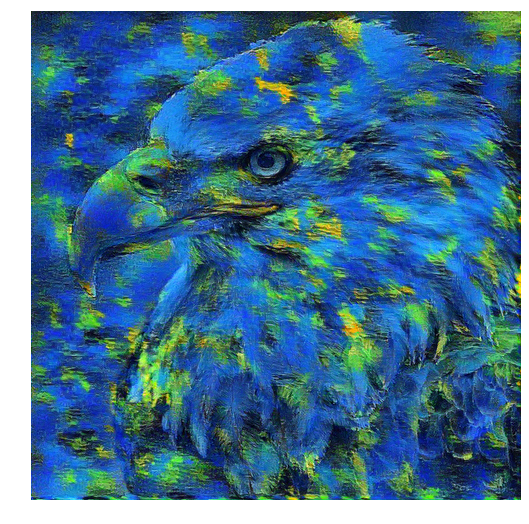

In [265]:
x = val_tfms.denorm(np.rollaxis(to_np(output_img_v.data),1,4))[0]
plt.figure(figsize=(9,9))
plt.imshow(x.clip(0, 1), interpolation='lanczos')
plt.axis('off');

In [0]:
for sf in sfs: sf.close()